In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install tensorflow
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 83.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_text as text

In [ ]:
import pandas as pd
df=pd.read_csv('drive/MyDrive/Deep_Learning/guardian_articles.csv')
# df = pd.read_csv("articles.csv")
df.head(10)

,article_id,sectionName,webTitle,webUrl,bodyContent,webPublicationDate,id
0,us-news/2016/jan/31/iowa-caucus-underdog-candi...,US news,Iowa underdogs put on brave faces despite all ...,https://www.theguardian.com/us-news/2016/jan/3...,As polling day looms and the cameras turn only...,2016-01-31T23:53:37Z,1
1,us-news/2016/jan/31/iowa-caucus-worlds-most-pa...,US news,Iowa caucus: hologram eagle and Jesus star on ...,https://www.theguardian.com/us-news/2016/jan/3...,"In Des Moines on Sunday, the Guardian was give...",2016-01-31T23:46:28Z,2
2,world/2016/jan/31/tanzania-britsh-helicopter-p...,World news,British pilot in Tanzania 'manoeuvred ​to save...,https://www.theguardian.com/world/2016/jan/31/...,A British pilot who was shot dead by an elepha...,2016-01-31T23:43:48Z,3
3,football/2016/jan/31/late-winner-gets-usa-off-...,Football,USA 3-2 Iceland | International friendly match...,https://www.theguardian.com/football/2016/jan/...,USA took a step toward shaking off the ghosts ...,2016-01-31T23:30:49Z,4
4,football/2016/jan/31/blackburn-paul-lambert-ox...,Football,Reinvigorated Paul Lambert reflects after impr...,https://www.theguardian.com/football/2016/jan/...,"The clean-shaven, spectacle free and suspiciou...",2016-01-31T22:30:10Z,5
5,football/blog/2016/jan/31/leyton-orient-cambri...,Football,Leyton Orient’s Kevin Nolan admits to hurt aft...,https://www.theguardian.com/football/blog/2016...,Reality caught up with Kevin Nolan on Saturday...,2016-01-31T22:30:10Z,6
6,football/2016/jan/31/jurgen-klopp-liverpool-yo...,Football,Jürgen Klopp hails Liverpool youngsters but re...,https://www.theguardian.com/football/2016/jan/...,Jürgen Klopp’s exasperation was understandable...,2016-01-31T22:30:10Z,7
7,football/2016/jan/31/saido-berahino-west-brom-...,Football,Saido Berahino has right attitude but he’s not...,https://www.theguardian.com/football/2016/jan/...,Tony Pulis hopes his only transfer business be...,2016-01-31T22:30:10Z,8
8,football/2016/jan/31/tommy-elphick-harry-arter...,Football,Tommy Elphick turns thoughts to Harry Arter af...,https://www.theguardian.com/football/2016/jan/...,Tommy Elphick paid tribute to his team-mate Ha...,2016-01-31T22:30:10Z,9
9,football/blog/2016/jan/31/john-terry-leaves-ch...,Football,John Terry to leave Chelsea as one of the club...,https://www.theguardian.com/football/blog/2016...,Many will just shrug and mutter good riddance....,2016-01-31T22:27:16Z,10


In [ ]:
vc = df['sectionName'].value_counts()  # get value counts of 'class' column
keep_classes = vc.index[vc >= 7000]  # get classes with counts >= 2
df = df[df['sectionName'].isin(keep_classes)]

In [ ]:
df.dropna()

,article_id,sectionName,webTitle,webUrl,bodyContent,webPublicationDate,id
0,us-news/2016/jan/31/iowa-caucus-underdog-candi...,US news,Iowa underdogs put on brave faces despite all ...,https://www.theguardian.com/us-news/2016/jan/3...,As polling day looms and the cameras turn only...,2016-01-31T23:53:37Z,1
1,us-news/2016/jan/31/iowa-caucus-worlds-most-pa...,US news,Iowa caucus: hologram eagle and Jesus star on ...,https://www.theguardian.com/us-news/2016/jan/3...,"In Des Moines on Sunday, the Guardian was give...",2016-01-31T23:46:28Z,2
2,world/2016/jan/31/tanzania-britsh-helicopter-p...,World news,British pilot in Tanzania 'manoeuvred ​to save...,https://www.theguardian.com/world/2016/jan/31/...,A British pilot who was shot dead by an elepha...,2016-01-31T23:43:48Z,3
3,football/2016/jan/31/late-winner-gets-usa-off-...,Football,USA 3-2 Iceland | International friendly match...,https://www.theguardian.com/football/2016/jan/...,USA took a step toward shaking off the ghosts ...,2016-01-31T23:30:49Z,4
4,football/2016/jan/31/blackburn-paul-lambert-ox...,Football,Reinvigorated Paul Lambert reflects after impr...,https://www.theguardian.com/football/2016/jan/...,"The clean-shaven, spectacle free and suspiciou...",2016-01-31T22:30:10Z,5
...,...,...,...,...,...,...,...
149833,sport/2022/jun/21/overton-twins-ready-to-make-...,Sport,Overton twins ready to make England history ag...,https://www.theguardian.com/sport/2022/jun/21/...,There was no Ben Stokes at England training on...,2022-06-21T17:33:41Z,149834
149834,world/2022/jun/21/marble-head-of-hercules-pull...,World news,Marble head of Hercules pulled up from Roman s...,https://www.theguardian.com/world/2022/jun/21/...,"For archaeologists, it’s the underwater find t...",2022-06-21T17:31:32Z,149835
149836,australia-news/2022/jun/22/the-small-town-with...,Australia news,The small town with a big potato that inspired...,https://www.theguardian.com/australia-news/202...,"Robertson is a small, pretty town perched on t...",2022-06-21T17:30:09Z,149837
149837,australia-news/2022/jun/22/power-to-ban-citize...,Australia news,Power to ban citizens from re-entering Austral...,https://www.theguardian.com/australia-news/202...,A high court decision striking down the home a...,2022-06-21T17:30:08Z,149838


In [ ]:
df.isnull().sum().sort_values(ascending = False)

bodyContent           578
article_id              0
sectionName             0
webTitle                0
webUrl                  0
webPublicationDate      0
id                      0
dtype: int64

In [ ]:
df['text']=df['bodyContent'].fillna("")

In [ ]:
df['sectionName'].value_counts()

World news        15501
Opinion           12130
Football          10896
Sport             10376
Australia news     7844
US news            7480
Politics           7074
Name: sectionName, dtype: int64

In [ ]:
from keras.utils.np_utils import to_categorical
labels = to_categorical(df['sectionName'].astype('category').cat.codes)
# Split the data into train and test sets
# train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],labels,test_size=0.2)

In [ ]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import os
os.environ["TFHUB_CACHE_DIR"] = "some_dir"

In [ ]:
import tensorflow_hub as hub
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# Define the number of classes in our dataset
# num_classes = 29

# Define the BERT model layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Define the neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(45, activation='sigmoid')(l)
l = tf.keras.layers.Dense(7, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])

# Compile the model with categorical_crossentropy loss and accuracy metric
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
              metrics=['accuracy'])
his=model.fit(X_train,y_train,validation_split=0.2, epochs=5)

Epoch 1/5
1426/1426 [==============================] - 802s 552ms/step - loss: 1.1338 - accuracy: 0.6014 - val_loss: 0.8171 - val_accuracy: 0.7097
Epoch 2/5
1426/1426 [==============================] - 792s 556ms/step - loss: 0.7970 - accuracy: 0.7158 - val_loss: 0.7418 - val_accuracy: 0.7277
Epoch 3/5
1426/1426 [==============================] - 788s 552ms/step - loss: 0.7459 - accuracy: 0.7281 - val_loss: 0.6348 - val_accuracy: 0.7731
Epoch 4/5
1426/1426 [==============================] - 788s 553ms/step - loss: 0.7240 - accuracy: 0.7388 - val_loss: 0.6367 - val_accuracy: 0.7650
Epoch 5/5
1426/1426 [==============================] - 787s 552ms/step - loss: 0.7071 - accuracy: 0.7418 - val_loss: 0.6426 - val_accuracy: 0.7682


In [ ]:
from keras.models import Sequential, load_model
#from tensorflow.keras.layers import KerasLayer
import pickle
#saving model
model.save('BERT_word_model.h5')
pickle.dump(his, open("history.p", "wb"))

In [ ]:
acc = model.evaluate(X_test,y_test,verbose=0) # verbose kept 0 to avoid way too big progress bar
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

Test set
  Loss: 0.639
  Accuracy: 0.770


In [ ]:
acc=his.history['accuracy']
val_acc=his.history['val_accuracy']
loss=his.history['loss']
val_loss=his.history['val_loss']

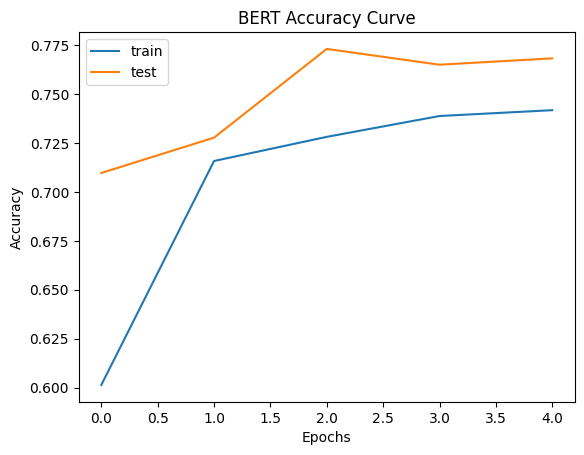

In [ ]:
import matplotlib.pyplot as plt
plt.title('BERT Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(range(len(acc)),acc, label='train')
plt.plot(range(len(val_acc)),val_acc, label='test')
plt.legend()
plt.show()

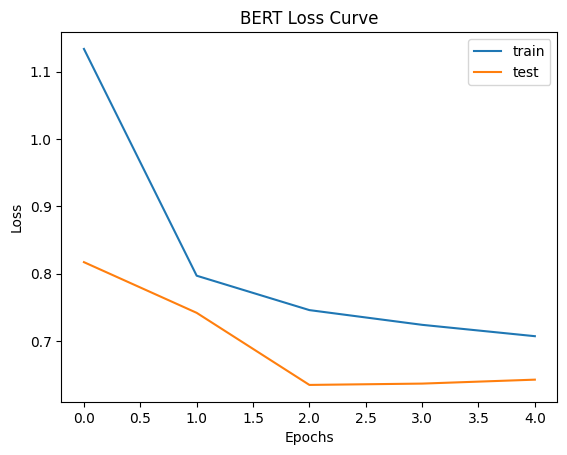

In [ ]:
plt.title('BERT Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(range(len(loss)),loss, label='train')
plt.plot(range(len(val_loss)),val_loss, label='test')
plt.legend()
plt.show()